# Experimento 6: Fibras Ópticas

**Nome:** Lucas Guimarães Braga **RA:** 182543

**Nome:** Lucas Zenichi Terada **RA:** 182775

**Nome:** Nícolas Franco Rufino Almeida Prado **RA:** 185142



In [1]:
# Helper imports and definitions

import serial
import numpy
from matplotlib import pyplot

%matplotlib inline

# Introdução

Em guias de onda dielétricos o confinamento das ondas eletromagnéticas pode ser modelado pelo fenômeno de reflexão interna total, que ocorre quando a onda incide de um meio com índice de refração maior, para outro com índice menor, com ângulo de incidência acima do *ângulo crítico*.
O ângulo crítico pode ser calculado a partir da lei de Snell:

\begin{equation}
\sin\theta_c = \frac{n_2}{n_1}
\end{equation}

em que $n_1$ é o íncide de refração do meio de origem, e $n_2$ é o íncide de refração do meio externo.

Utilizando essa propriedade é possível guiar a luz (onda eletromagnética com frequência da ordem de 600 THz) através de guias formados por dielétricos transparentes.
Em especial, estudaremos as fibras ópticas, caracterizadas por sua geometria cilíndrica e, na sua forma mais simples, formadas por 2 camadas de materiais: um núcleo de alto índice de refração envolto por uma casca com índice mais baixo.


Apesar de simples, a descrição da propagação em fibras a partir da reflexão interna total nos possibilita entender outro fenômeno, as perdas por curvatura.
Quando curvamos a fibra óptica alteramos sua geometria, de modo que parte do feixe que se propaga em seu interior deixa de incidir da interface núcleo-casca acima do ângulo crítico.
Essa fração da luz escapa da fibra e resulta em perdas de sinal.

A luz transmitida pela fibra não se propaga, contudo, apenas no núcleo.
A partir de uma análise mais rigorosa, vê-se que parte da energia encontra-se na região da casca, na chamada cauda evanescente dos campos eletromagnéticos.
Nessa região a amplitude dos campos decai exponencialmente com a distância do núcleo.
Assim, em fibras sem casca, ou, mais precisamente, onde a casca é formada pelo ambiente, pode-se utilizar a cauda evanescente para detectar variações ambientais.
Esse é o princípio de funcionamento de uma infinidade de sensores a fibra óptica utilizados tanto em laboratório quanto comercialmente.

# Configuração para Medição de Atenuação

1. Utilizando o kit de experimentos ópticos conecte:
   - POT. na porta (_slot_) 2 da placa TX
   - ANAL. TX na porta 3 da placa TX
   - ANAL. RX na porta 3 da placa RX
1. Conecte as fontes de tensão.
1. Conecte a fibra adequada aos terminais das placas TX e RX e meça com o osciloscópio o sinal entre os pontos MP2 e GND em ambas as placas.

## Prática 1

Com a fibra desenrolada, ajuste o nível de sinal do receptor usando o potenciômetro do transmissor e anote esta medida.

Meça então a transmissão com a fibra mais longa enrolada firmemente com 1 volta ao redor do cilindro metálico de 30 mm de diâmetro.

Repita essa medição para 2, 3, 4 e 5 voltas e para o cilíndro de 15 mm de diâmetro.

Plote os resultados e ajuste uma reta para obter um coeficiente de atenuação por número de voltas para cada cilindro.
Interprete os resultados obtidos.

Attenuation for 30 mm bend diamater: (-0.28 ± 0.01) V/turn
Attenuation for 15 mm bend diamater: (-0.27 ± 0.02) V/turn


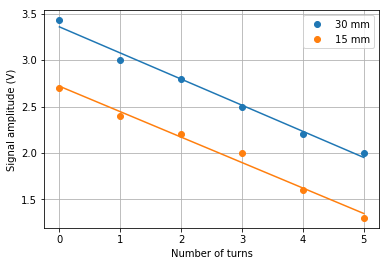

In [2]:
# Number of turns
turns = numpy.array([0, 1, 2, 3, 4, 5])

trans = {}

# Received signal for diameter of 30 mm [V]
trans[30] = numpy.array([3.43, 3.00, 2.80, 2.50, 2.20, 2.00])

# Received signal for diameter of 15 mm [V]
trans[15] = numpy.array([2.70, 2.40, 2.20, 2.00, 1.60, 1.30])

for dia, tr in trans.items():
    coef, cov = numpy.polyfit(turns, tr, 1, cov=True)
    std = numpy.sqrt(cov.diagonal())
    print(f'Attenuation for {dia} mm bend diamater: ({coef[0]:.2f} ± {std[0]:.2f}) V/turn')

    lines = pyplot.plot(turns, coef[0] * turns + coef[1])
    pyplot.plot(turns, tr, 'o', label=f'{dia} mm', color=lines[0].get_color())

pyplot.legend()
pyplot.xlabel('Number of turns')
pyplot.ylabel('Signal amplitude (V)')
pyplot.grid(True)

**RESPOSTA:** Como pode ser observado pelos dados, quanto maior o número de voltas, maior a perda da amplitude do sinal. Também observa-se que a curva para o diâmetro 15mm tem maior declive e portanto maior coeficiente de atenuação por volta quando comparada à de 30mm. Conclui-se portanto que quanto maior o número de voltas e mais fechadas as curvas, maior a perda do sinal.

Qual a importância do efeito observado?

**RESPOSTA:** O efeito de perdas em função do número de voltas e do raio da curva mostra a importância de se cuidar para minimizar o número de curvas e a intensidade destas ao se fazer a instalação de fibras ópticas para que as perdas sejam as menores possíveis.

## Prática 2

1. Passe uma fibra curta pelo interior do cilindro oco disponível, formando um laço.
1. Meça a tensão recebida no osciloscópio.
1. Refaça a medida para o laço imerso em água pura e em água com açúcar.

Interprete os resultados e proponha aplicações baseadas no efeito observado.

**RESPOSTA**

Dados obtidos:

ar: 1.90 V

água: 1.80 V

água com açúcar: 1.77 V

A tensão recebida quando o laço de fibra estava imerso em água com açúcar foi menor do que quando imerso em água, e esta, por sua vez, menor do que quando "imerso" no ar. Isso mostra que quanto mais refringente o meio, mais perdas ocorrem com o mesmo raio de curva.

Uma possível aplicação, dado o efeito descrito acima, é para medição da concentração de um substrato no meio, como a salinidade da água, através da quantidade de perdas, raciocínio inverso do aplicado no experimento. 

## Prática 3

1. Desconecte a fibra do RX e conecte-a ao paquímetro.
1. Conecte outra fibra entre o RX e o segundo conector do paquímetro.

Colete os valores de tensão no osciloscópio para diferentes aberturas do paquímetro.
Inicie com espaçamento zero e aumente de 1 em 1 mm até que não seja mais possível realizar a medição.

Analise os resultados obtidos e cite possveis fontes de erro para o experimento.

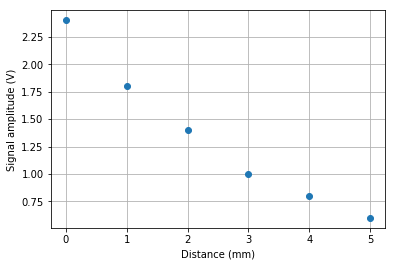

In [3]:
# Distance between terminals [mm]
distance = [0, 1, 2, 3, 4, 5]

# Measurements [V]
signal = [2.40, 1.80, 1.40, 1.00, 0.80, 0.60]

pyplot.plot(distance, signal, 'o')
pyplot.xlabel('Distance (mm)')
pyplot.ylabel('Signal amplitude (V)')
pyplot.grid(True)

**RESPOSTA:** Observando os dados coletados, a amplitude do sinal parece cair de forma quadrática com o aumento da distância, o que faz sentido ao se pensar que com o aumento da distância, a área de casca esférica em que se distribuirá a luz é proporcional a $r^2$.

O principal erro experimental se deve à falta de precisão ao se ajustar manualmente a abertura do paquímetro.

# Configuração para Transmissão Analógica

1. Utilizando o kit de experimentos ópticos conecte:
   - ANAL. TX. na porta 3 da placa TX
   - POT. na porta 1 da placa TX
   - LF.GEN. na porta 2 da placa TX
   - ANAL. RX na porta 3 da placa RX
   - LF.AMP. na porta 2 da placa RX
1. Conecte as fontes de tensão.
1. Conecte uma fibra adequada aos terminais das placas TX e RX.

## Prática 4

1. Ajuste os potenciômetros para melhor recepção sonora.
1. Substitua o LF.GEN. pelo MIC. AMP.
1. Realize a transmissão sonora usando gerador externo.

Descreva suas observações e conclusões.

**RESPOSTA:** Por mais que se ajustasse os potenciômetros, não foi possível obter uma qualidade muito boa de áudio (o som era compreensível porém com ruído). Isso provavelmente se deve à qualidade do LED e do foto-receptor que acabavam introduzindo ruídos no sinal transmitido pela fibra.

# Configuração para Transmissão Digital

1. Utilizando o kit de experimentos ópticos conecte:
   - USB TX na porta 2 da placa TX
   - Dig. TX na porta 3 da placa TX
   - USB RX na porta 2 da placa RX
   - Dig. RX na porta 3 da placa RX
1. Conecte as fontes de tensão.
1. Conecte a fibra adequada aos terminais das placas TX e RX.
1. Conecte as placas ao computador usando uma interface USB e observe a identificação da porta serial criada através do gerenciador de dispositivos do Windows.

## Prática 5

Procure entender o programa abaixo e execute-o em parceria com outra bancada para a criação de um _chat_ ponto a ponto.
Será necessário configurar corretamente os nomes das portas seriais de comunicação identificados no passo 4 anterior (**COM***).

In [ ]:
with serial.Serial('COM*', 300) as tx, \
     serial.Serial('COM*', 300) as rx:
    msg = ''
    incomming = b''
    while msg != 'exit':
        if rx.in_waiting == 0:
            msg = input('$ ')
            tx.write(msg.encode('utf-8') + b'\n')
        else:
            incomming += rx.read()
            if len(incomming) > 0 and incomming[-1] == 10:
                print('> ' + incomming[:-1].decode('utf-8'))
                incomming = b''

Que diferenças você observa entre as formas de comunicações digital e analógica?

**RESPOSTA:** A transmissão digital necessita de uma etapa extra de codificação do sinal a ser enviado e decodificação do sinal recebido, porém é extremamente mais robusto a interferências de ruídos, visto que durante a transmissão digital nenhum caractere errado foi recebido, muito diferente da situação analógica.

# Orientação para submissão do relatório final

Após finalizar o experimento e o relatório:

1. Gere um arquivo PDF do roteiro completo: clique em *File/Print Preview* e gere o PDF;
1. **Revise** seu relatório;
1. Envie o relatório final pelo site do curso (apenas um aluno envia pelo grupo);
1. Crie um backup do seu relatório (arquivos ipynb e PDF) e guarde com você;
1. Apague os seus arquivos de trabalho do computador.
 
Assegure-se de que:
- O início do relatório indentifica os alunos e os respectivos RAs;
- Todas as figuras foram carregadas apropriadamente e estão legíveis;
- O texto das respostas nas células não está incompleto ou cortado;
- As grandezas apresentadas no texto e nos cálculos possuem unidades;
- Seus resultados sejam referenciados e discutidos no texto.